In [2]:
# set up the environment
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


the length of the eeg_data is: 32563
which in time duration is:  63.599609375  seconds


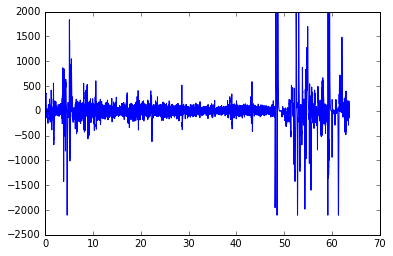

In [8]:
# load the eeg data that Vic or Iran prepared using matlab for you
eeg_data = np.genfromtxt('calm', delimiter=',')

SR = 512.0

import scipy as sp
from scipy.io.wavfile import read # allows us to read in wave files

# this is for an audio file 
# comment this out if you want to use EEG data
# audio = read("cave1.wav") # Impulse Response: should be stereo 
# SR = audio[0]
# # calculuate the sample period
# T = 1.0/SR;
# # extract the audio sample values
# audioValues = np.array(audio[1],dtype=float)
# eeg_data = audioValues[:,1]




print 'the length of the eeg_data is:', len(eeg_data)

duration = len(eeg_data)/SR

print 'which in time duration is: ' , duration, ' seconds'

# generate a time vector
time = np.linspace(0,duration,len(eeg_data))

# let's see our raw data!!!!!!!!!!!!
plt.plot(time, eeg_data)
plt.show()
from scipy.io.wavfile import write # import to write out wave files


eeg_data=eeg_data/np.amax(eeg_data)

write('eegData.wav',512,eeg_data)

This is a sample value in the fft:  (91365.6072137+1423338.76501j)


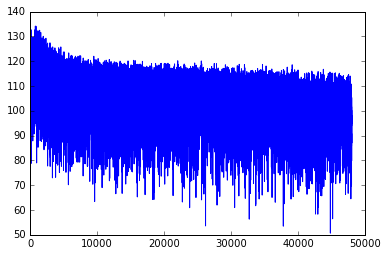

In [19]:
# Now we can do the fft 
eeg_data_fft = np.fft.fft(eeg_data)

# let's keep only the positive frequencies
eeg_data_fft_p = eeg_data_fft[0:len(eeg_data_fft)/2]

print 'This is a sample value in the fft: ', eeg_data_fft_p[438]

eeg_data_fft_p_abs = np.abs(eeg_data_fft_p)

eeg_data_fft_p_abs_db = 20*np.log10(eeg_data_fft_p_abs)

# let's generate a frequency axis
freq = np.linspace(0,SR/2,len(eeg_data_fft_p_abs_db))

# let's have a look at the fft of the data
plt.plot(freq,eeg_data_fft_p_abs_db)
plt.show()